# Assignment 6:
## Part 1:
Read the data into a  dataframe:

In [46]:
import pandas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np

data = pandas.read_csv("data/expanded")
dummies = pandas.get_dummies(data)
X, y = dummies, dummies["EDIBLE_EDIBLE"]
print(X.shape)
print(y.shape)

skb = SelectKBest(chi2, k=3)
skb.fit(X, y)
X_new = skb.transform(X)

print(X_new.shape)

# Fetch the selected feature indices and print the corresponding feature names
np.array(dummies.columns)[skb.get_support(indices=True)]





(8415, 119)
(8415,)
(8415, 3)


array(['EDIBLE_EDIBLE', 'EDIBLE_POISONOUS', 'ALMOND_NONE'], dtype=object)

By running this code we find that the edibility feature is the most selective one
(as it only has 2 classifications to begin with)

## Part 2:
constructing reduced space:

Original space: (8415, 119)
PCA space: (8415, 3)
['EDIBLE_EDIBLE', 'EDIBLE_POISONOUS', 'ALMOND_NONE']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


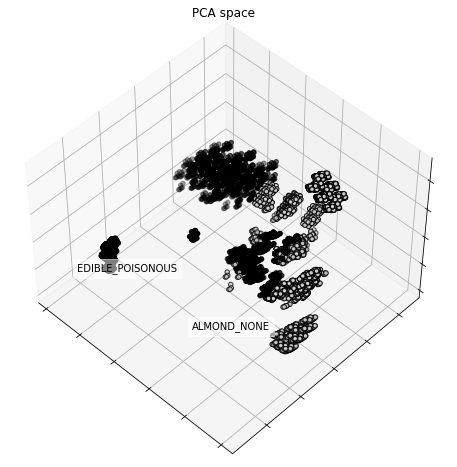

In [58]:
from sklearn import decomposition
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print("Original space:",X.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(X)
Xpca = pca.transform(X)

print("PCA space:",Xpca.shape)
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0.0, 0.0, 1, 1], elev=48, azim=134)

plt.cla()

labels = [dummies.columns[x] for x in skb.get_support(indices=True)]
print(labels)
for name, label in [(labels[0], 0), (labels[1], 1), (labels[2], 2) ]:
   ax.text3D(Xpca[y == label, 0].mean(),
              Xpca[y == label, 1].mean() + 2,
              Xpca[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the ls to have colors matching the cluster results

# y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(Xpca[:, 0], Xpca[:, 1], Xpca[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title("PCA space")

plt.draw()
plt.show()


## Part 3:
You can see that edibility accounts for most of the variance in the set, and as such it will be natural
to use this as our basis for the reduced space. Third most selective feature is the flavour of the mushroom,
most commonly none.




